<p style="font-size:30px;text-align:center"> <b>Personalized Medicine: Redefining Cancer Treatment</b> </p>

# 1. Business Problem

### 1.1 Data Description
In this competition you will develop algorithms to classify genetic mutations based on clinical evidence (text).

There are nine different classes a genetic mutation can be classified on.

This is not a trivial task since interpreting clinical evidence is very challenging even for human specialists. Therefore, modeling the clinical evidence (text) will be critical for the success of your approach.

Both, training and test, data sets are provided via two different files. One (training/test_variants) provides the information about the genetic mutations, whereas the other (training/test_text) provides the clinical evidence (text) that our human experts used to classify the genetic mutations. Both are linked via the ID field.

Therefore the genetic mutation (row) with ID=15 in the file training_variants, was classified using the clinical evidence (text) from the row with ID=15 in the file training_text

Finally, to make it more exciting!! Some of the test data is machine-generated to prevent hand labeling. You will submit all the results of your classification algorithm, and we will ignore the machine-generated samples.

<b>source: </b> https://www.kaggle.com/c/msk-redefining-cancer-treatment/data

#### 1.1.1 File descriptions
* <b>training_variants</b> - a comma separated file containing the description of the genetic mutations used for training. Fields are ID (the id of the row used to link the mutation to the clinical evidence), Gene (the gene where this genetic mutation is located), Variation (the aminoacid change for this mutations), Class (1-9 the class this genetic mutation has been classified on)
* <b>training_text</b> - a double pipe (||) delimited file that contains the clinical evidence (text) used to classify genetic mutations. Fields are ID (the id of the row used to link the clinical evidence to the genetic mutation), Text (the clinical evidence used to classify the genetic mutation)
* <b>test_variants</b> - a comma separated file containing the description of the genetic mutations used for training. Fields are ID (the id of the row used to link the mutation to the clinical evidence), Gene (the gene where this genetic mutation is located), Variation (the aminoacid change for this mutations)
* <b>test_text</b> - a double pipe (||) delimited file that contains the clinical evidence (text) used to classify genetic mutations. Fields are ID (the id of the row used to link the clinical evidence to the genetic mutation), Text (the clinical evidence used to classify the genetic mutation)
* <b>submissionSample</b> - a sample submission file in the correct format

### 1.2. Real-world/Business objectives and constraints.

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

### 1.3 Evaluation

Submissions are evaluated on <b>Multi Class Log Loss</b> between the predicted probability and the observed target.

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

## 2. Mapping Real world problem into ML problem

### 2.1 Type of Machine Learning

There are nine different classes a genetic mutation can be classified into => Multi class classification
problem

### 2.2 Performance Metric

* malticlass log loss
* confusion Matrix

### 2.3 Train, CV and Test Data

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of
data respectively

## 3. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [4]:
#reading training_variants file
variant_df=pd.read_csv("training/training_variants")
variant_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [5]:
print("Number of data points in training variants:",variant_df.shape[0])
print("Number of features in training variants:",variant_df.shape[1])
print("All features:: ",variant_df.columns.values)

Number of data points in training variants: 3321
Number of features in training variants: 4
All features::  ['ID' 'Gene' 'Variation' 'Class']


In [6]:
#reading training text
text_df=pd.read_csv("training/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
text_df.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### 3.1 Basic Analysis

In [7]:
print("Number of data points in training variants:",text_df.shape[0])
print("Number of features in training variants:",text_df.shape[1])
print("All features:: ",text_df.columns.values)

Number of data points in training variants: 3321
Number of features in training variants: 2
All features::  ['ID' 'TEXT']


##### observation:
* both datasets have same number of datapoints
* variant datasets has 4 features and text_df has 2 features 
* both datasets have a common column which is "ID"

In [12]:
import nltk
nltk.download('stopwords')
import re
import os
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\G1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
stopword = stopwords.words('english')

In [14]:
# let remove stopwords and clean text
def nlp_preprocessing(text):
#     print(type(text))
    if type(text) is str:
        # replace every special char with space
        text=re.sub("[^a-zA-Z0-9\n]"," ",text)
        # replace multiple space with single space
        text=re.sub("\s+"," ",text)
        # convert text to lower case
        text=text.lower()
        #removing all stopwords from text
        text=" ".join([word for word in text.split() if word not in stopword and len(word)<15])
    return text

In [15]:
# saving the concated file
if not os.path.isfile("training/merged_data.csv"):
    text_df["TEXT"]=[nlp_preprocessing(text) for text in tqdm(text_df["TEXT"])]
    #Lets merge both dataset by Id key
    df=variant_df.merge(text_df,how='inner',on="ID")
    df.to_csv("training/merged_data.csv",index=False)

else:
    df=pd.read_csv("training/merged_data.csv")
df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 3321/3321 [01:01<00:00, 53.83it/s]


,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [16]:
# Checking any NULL value exist
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
 4   TEXT       3316 non-null   object
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [17]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


**Observation:** It seems that there are some null value which present in TEXT feature

* We can fill NULL value with concatation of gene and variation columns


In [18]:
#filling NULL value with concatation of gene and variation columns
df.loc[df["TEXT"].isnull(),"TEXT"]=df.Gene+" "+df.Variation

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
 4   TEXT       3321 non-null   object
dtypes: int64(2), object(3)
memory usage: 284.7+ KB


In [20]:
#split dataset into train,test and validation set
X=df
y=df['Class']

In [21]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn.metrics import log_loss,plot_confusion_matrix,confusion_matrix
warnings.filterwarnings(action="ignore")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

In [23]:
# data distribution 
print("Number of train data points:",X_train.shape[0])
print("Number of validation data points:",X_cv.shape[0])
print("Number of test data points:",X_test.shape[0])

Number of train data points: 2124
Number of validation data points: 532
Number of test data points: 665


In [24]:
# plotting distribution of Y
train_y_sort=X_train['Class'].value_counts(normalize=True,sort=True)
test_y_sort=X_test['Class'].value_counts(normalize=True,sort=True)
cv_y_sort=X_cv['Class'].value_counts(normalize=True,sort=True)


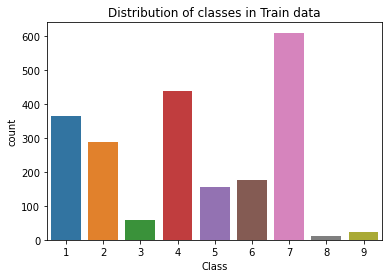

Number of data point in class 7 :: 28.67%
Number of data point in class 4 :: 20.67%
Number of data point in class 1 :: 17.09%
Number of data point in class 2 :: 13.61%
Number of data point in class 6 :: 8.29%
Number of data point in class 5 :: 7.3%
Number of data point in class 3 :: 2.68%
Number of data point in class 9 :: 1.13%
Number of data point in class 8 :: 0.56%


In [25]:
sns.countplot(x=y_train)
plt.title("Distribution of classes in Train data")
plt.show()
# sorted_y=np.argsort(train_y_sort,order="dsc")
for i in range(len(train_y_sort)):
    print("Number of data point in class {0} :: {1}%".format(train_y_sort.index[i],round(train_y_sort.values[i]*100,2)))

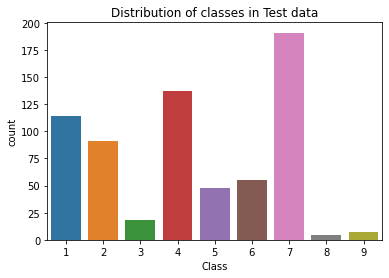

Number of data point in class 7 :: 28.72%
Number of data point in class 4 :: 20.6%
Number of data point in class 1 :: 17.14%
Number of data point in class 2 :: 13.68%
Number of data point in class 6 :: 8.27%
Number of data point in class 5 :: 7.22%
Number of data point in class 3 :: 2.71%
Number of data point in class 9 :: 1.05%
Number of data point in class 8 :: 0.6%


In [26]:
sns.countplot(x=y_test)
plt.title("Distribution of classes in Test data")
plt.show()
# sorted_y=np.argsort(train_y_sort,order="dsc")
for i in range(len(test_y_sort)):
    print("Number of data point in class {0} :: {1}%".format(test_y_sort.index[i],round(test_y_sort.values[i]*100,2)))

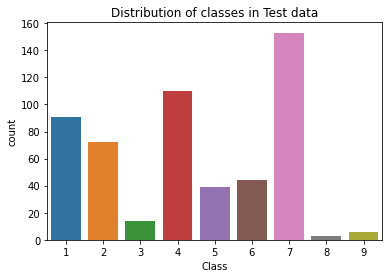

Number of data point in class 7 :: 28.76%
Number of data point in class 4 :: 20.68%
Number of data point in class 1 :: 17.11%
Number of data point in class 2 :: 13.53%
Number of data point in class 6 :: 8.27%
Number of data point in class 5 :: 7.33%
Number of data point in class 3 :: 2.63%
Number of data point in class 9 :: 1.13%
Number of data point in class 8 :: 0.56%


In [27]:
sns.countplot(x=y_cv)
plt.title("Distribution of classes in Test data")
plt.show()
# sorted_y=np.argsort(train_y_sort,order="dsc")
for i in range(len(cv_y_sort)):
    print("Number of data point in class {0} :: {1}%".format(cv_y_sort.index[i],round(cv_y_sort.values[i]*100,2)))

In [28]:
rand_probs=np.random.rand(1,9)
rand_probs=rand_probs/sum(rand_probs.flatten())
rand_probs.flatten()

array([0.02035682, 0.05210285, 0.14025569, 0.02644176, 0.12962874,
       0.12190047, 0.15595956, 0.17018329, 0.1831708 ])

In [30]:
# source: https://onestopdataanalysis.com/confusion-matrix-python/
def plot_confusion_matrix(data, labels,title="Confution Matrix"):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title(title)
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    # plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()

Log Loss on Cross validation data using Random Model:: 2.5531348532309135


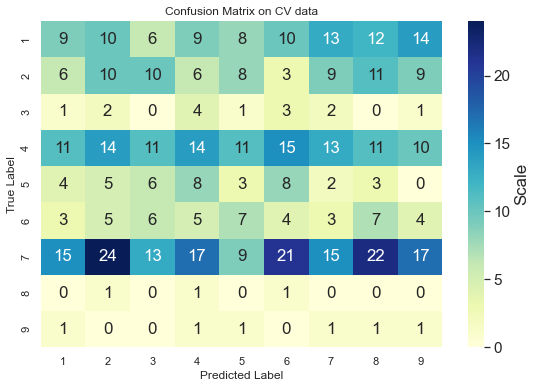

--------------------------------------------------
Log Loss on Test data using Random Model:: 2.4524223576383193


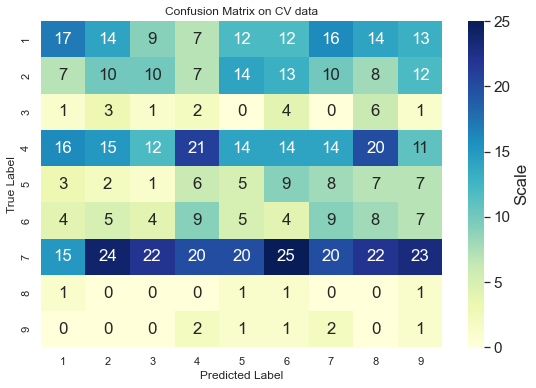

In [31]:
# Lets see random Model for classification
# benifit of Random Model that we will have idea that how worst our model can be
# we need to generate 9 number and the sum of it would be 1
cv_pred_y=np.zeros((y_cv.shape[0],9))
test_pred_y=np.zeros((y_test.shape[0],9))
##################################################
for i in range(y_cv.shape[0]):
    rand_probs=np.random.rand(1,9)
    rand_probs=rand_probs/sum(rand_probs.flatten())
    cv_pred_y[i]=rand_probs.flatten()
print("Log Loss on Cross validation data using Random Model::",log_loss(y_cv,cv_pred_y))

pred_y=np.argmax(cv_pred_y,axis=1)
matrix=confusion_matrix(y_cv,pred_y+1)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Confusion Matrix on CV data")
##################################################
print("-"*50)
for i in range(y_test.shape[0]):
    rand_probs=np.random.rand(1,9)
    rand_probs=rand_probs/sum(rand_probs.flatten())
    test_pred_y[i]=rand_probs.flatten()
print("Log Loss on Test data using Random Model::",log_loss(y_test,test_pred_y))
pred_y=np.argmax(test_pred_y,axis=1)
matrix=confusion_matrix(y_test,pred_y+1)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Confusion Matrix on CV data")

#### Observation: 

* Now we know that our log loss for other model must not be greater than Random model log loss.

### 3.3 Univariate Analysis

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV

In [33]:
# Let's See that How useful Gene Feature is ? 
# Gene is a categorical feature so we can convert this feature into vector two way.
#     1. One hot encoding
#     2.Respose coding

In [34]:
print("Number of unique Gene::",len(X_train['Gene'].unique()))

Number of unique Gene:: 236


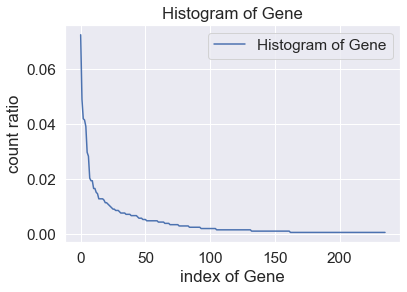

In [35]:
unique_gene_count=X_train['Gene'].value_counts(normalize=True,sort=True)
plt.plot(unique_gene_count.values,label="Histogram of Gene")
plt.title("Histogram of Gene")
plt.xlabel("index of Gene")
plt.ylabel("count ratio")
# plt.xticks([0,50,100,150,200,250])
plt.legend()
plt.show()

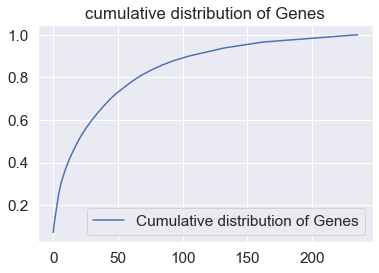

In [36]:
#Plotting Cummulative Distribution of Gene
c = np.cumsum(unique_gene_count.values)
plt.plot(c,label='Cumulative distribution of Genes')
plt.title("cumulative distribution of Genes")
plt.legend()
plt.show()

#### 3.3.1 Gene Feature Analysis

In [37]:
# convert Gene Feature into vector using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
train_gene=vectorizer.fit_transform(X_train['Gene'])
test_gene=vectorizer.transform(X_test["Gene"])
cv_gene=vectorizer.transform(X_cv["Gene"])

In [38]:
# We will train a model with Gene feature and we will check that how valuable this feature is 
# for predicting class
model=SGDClassifier(penalty="l2",loss="log")
alpha=[10**i for i in range(-4,2)]
cv_error_lt=[]
for i in alpha:
    model=SGDClassifier(alpha=i,penalty="l2",loss="log",n_jobs=-1)
    model.fit(train_gene,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_gene,y_train)
    pred=clf.predict_proba(cv_gene)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  


For the calue of alpha 0.0001 log loss ::1.1620200136417451
For the calue of alpha 0.001 log loss ::1.1998852460917424
For the calue of alpha 0.01 log loss ::1.3297845221093216
For the calue of alpha 0.1 log loss ::1.4396807009411416
For the calue of alpha 1 log loss ::1.4734659018392247
For the calue of alpha 10 log loss ::1.4777620326867238


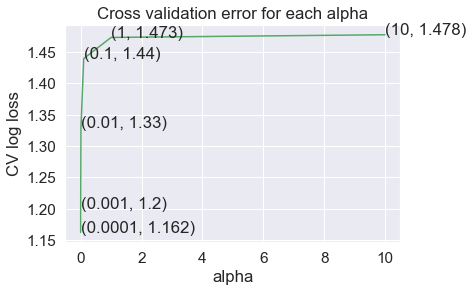

In [39]:
fig, ax = plt.subplots()

ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [40]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=SGDClassifier(alpha=best_alpha,penalty="l2",loss="log",n_jobs=-1)
model.fit(train_gene,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_gene,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_gene)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_gene)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_gene)))


log loss with best alpha on Training data: 0.9817300325275264
log loss with best alpha on Test data: 1.2405079039630313
log loss with best alpha on CV data: 1.1648993157853749


<b>Ques: </b>  Is the Gene feature stable across all the data sets (Test, Train, Cross
validation)

<b> Ans: </b> Yes, All datasets (Train,Test and CVs) are stable that's why CV and test error are not significantaly more than Train error

In [41]:
print("Ques:: How many data points of CV and Test are covered by 236 unique Genes of Train datasets??")
cv_coverage=X_cv[X_cv['Gene'].isin(list(set(X_train["Gene"])))].shape[0]
test_coverage=X_test[X_test['Gene'].isin(list(set(X_train["Gene"])))].shape[0]
print("Number of {0} out of {1} in CV data:: {2}".format(str(cv_coverage),str(X_cv.shape[0]),str(cv_coverage/X_cv.shape[0]*100)))
print("Number of {0} out of {1} in Test data:: {2}".format(test_coverage,X_test.shape[0],test_coverage/X_test.shape[0]*100))

Ques:: How many data points of CV and Test are covered by 236 unique Genes of Train datasets??
Number of 523 out of 532 in CV data:: 98.30827067669173
Number of 642 out of 665 in Test data:: 96.54135338345866


<b> Observation</b>
* Here we train our model with only Gene feature 
* We observe that Loss with Gene feture is significantly less than random Model
* Hence this Gene Feture is very useful to classify the Classes.

#### 3.3.1 Variation Feature Analysis

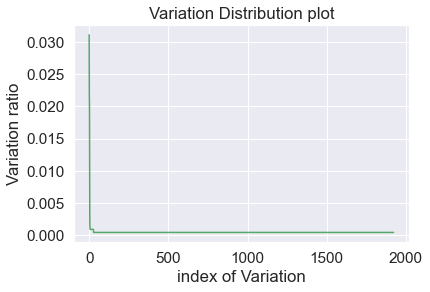

In [42]:
unique_variation=X_train.Variation.value_counts(normalize=True,sort=True)
plt.plot(unique_variation.values,c='g')
plt.title("Variation Distribution plot")
plt.xlabel("index of Variation")
plt.ylabel("Variation ratio")
plt.show()

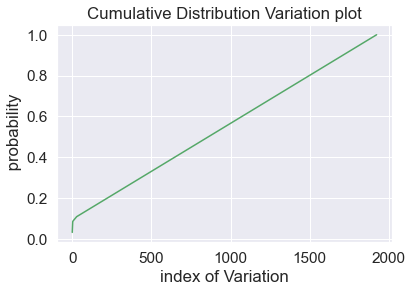

In [43]:
c=np.cumsum(unique_variation.values)
plt.plot(c,c='g')
plt.title("Cumulative Distribution Variation plot")
plt.xlabel("index of Variation")
plt.ylabel(" probability")
plt.show()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2=CountVectorizer()
train_var=vectorizer2.fit_transform(X_train['Variation'])
test_var=vectorizer2.transform(X_test["Variation"])
cv_var=vectorizer2.transform(X_cv["Variation"])

In [45]:
# We will train a model with Variation feature and we will check that how valuable this feature is 
# for predicting class
model=SGDClassifier(penalty="l2",loss="log")
alpha=[10**i for i in range(-4,2)]
cv_error_lt=[]
for i in alpha:
    model=SGDClassifier(alpha=i,penalty="l2",loss="log",n_jobs=-1)
    model.fit(train_var,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_var,y_train)
    pred=clf.predict_proba(cv_var)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  


For the calue of alpha 0.0001 log loss ::1.6782158305394284
For the calue of alpha 0.001 log loss ::1.6943144579837974
For the calue of alpha 0.01 log loss ::1.6990929146106601
For the calue of alpha 0.1 log loss ::1.7137610641059726
For the calue of alpha 1 log loss ::1.716592185860734
For the calue of alpha 10 log loss ::1.716800457746947


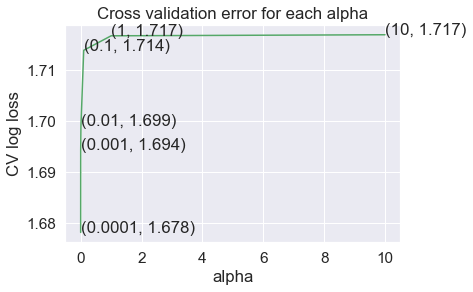

In [46]:
fig, ax = plt.subplots()

ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [47]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=SGDClassifier(alpha=best_alpha,penalty="l2",loss="log",n_jobs=-1)
model.fit(train_var,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_var,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_var)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_var)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_var)))


log loss with best alpha on Training data: 0.7428974138852161
log loss with best alpha on Test data: 1.7134637325102098
log loss with best alpha on CV data: 1.67937832813935


In [48]:
print("Ques:: How many data points of CV and Test are covered by 236 unique Genes of Train datasets??")
cv_coverage=X_cv[X_cv['Variation'].isin(list(set(X_train["Variation"])))].shape[0]
test_coverage=X_test[X_test['Variation'].isin(list(set(X_train["Variation"])))].shape[0]
print("Number of {0} out of {1} in CV data:: {2}".format(str(cv_coverage),str(X_cv.shape[0]),str(cv_coverage/X_cv.shape[0]*100)))
print("Number of {0} out of {1} in Test data:: {2}".format(test_coverage,X_test.shape[0],test_coverage/X_test.shape[0]*100))

Ques:: How many data points of CV and Test are covered by 236 unique Genes of Train datasets??
Number of 53 out of 532 in CV data:: 9.962406015037594
Number of 67 out of 665 in Test data:: 10.075187969924812


#### 3.3.3 Univariate Analysis on Text Feature
* How many unique words are present in train data?
* How are word frequencies distributed?
* How to featurize text field?
* Is the text feature useful in predicitng y_i?
* Is the text feature stable across train, test and CV datasets?

In [49]:
# How many unique words are present in train data?
def get_unique_words(data):
    unique_words=set()
    for text in data:
        unique_words.update(text.split())
    return unique_words
train_text_unique_words=get_unique_words(X_train['TEXT'])
print("unique words in train data:: {0}".format(len(train_text_unique_words)))

unique words in train data:: 117072


In [50]:
# How are word frequencies distributed?
# or Is the text feature stable across train, test and CV datasets?
cv_text_unique_words=get_unique_words(X_cv["TEXT"])
cv_text_coverage=len(cv_text_unique_words & train_text_unique_words)
test_text_unique_words=get_unique_words(X_test.TEXT)
test_text_coverage=len(np.intersect1d(list(test_text_unique_words),list(train_text_unique_words)))
print("In CV data,{0} out of {1} :: {2}%".format(cv_text_coverage,len(cv_text_unique_words),cv_text_coverage/len(cv_text_unique_words)*100))

print("In test data,{0} out of {1} :: {2}%".format(test_text_coverage,len(test_text_unique_words),test_text_coverage/len(test_text_unique_words)*100))


In CV data,49387 out of 60261 :: 81.95516171321418%
In test data,57521 out of 72325 :: 79.53128240580712%


**How to featurize text field?**
* We can featurize this text data following way:
    * Bag of words
    * TFIDF
    * W2V
    * TFIDF-W2V
    * Response Coding

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow=CountVectorizer(min_df=5)
train_text=bow.fit_transform(X_train["TEXT"])
test_text=bow.transform(X_test['TEXT'])
cv_text=bow.transform(X_cv.TEXT)

In [52]:

alpha=[10**i for i in range(-4,4)]
cv_error_lt=[]
for i in alpha:
    model=SGDClassifier(alpha=i,penalty="l2",loss="log",n_jobs=-1)
    model.fit(train_text,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_text,y_train)
    pred=clf.predict_proba(cv_text)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  


For the calue of alpha 0.0001 log loss ::1.8154572013375871
For the calue of alpha 0.001 log loss ::1.2643973259706514
For the calue of alpha 0.01 log loss ::1.256253602015509
For the calue of alpha 0.1 log loss ::1.2542499349333354
For the calue of alpha 1 log loss ::1.1602975731805227
For the calue of alpha 10 log loss ::1.1201010294722458
For the calue of alpha 100 log loss ::1.26316171586315
For the calue of alpha 1000 log loss ::1.5396125199237005


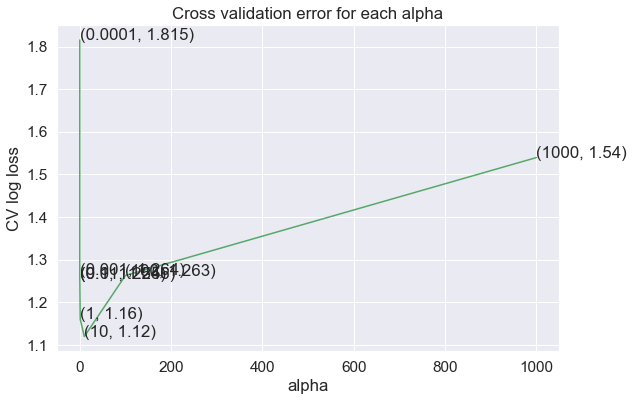

In [53]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [54]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=SGDClassifier(alpha=best_alpha,penalty="l2",loss="log",n_jobs=-1)
model.fit(train_text,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_text,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_text)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_text)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_text)))


log loss with best alpha on Training data: 0.8673177017924043
log loss with best alpha on Test data: 1.2643715250936276
log loss with best alpha on CV data: 1.122746526103501


#### Ques: Is the text feature useful in predicitng y_i?
<b>Ans: </b> Yes,It seems like useful.

# 4. Machine Learning Models

In [55]:
tfidf=TfidfVectorizer(min_df=5)
train_text_tf=tfidf.fit_transform(X_train["TEXT"])
test_text_tf=tfidf.transform(X_test['TEXT'])
cv_text_tf=tfidf.transform(X_cv.TEXT)

In [56]:
from scipy.sparse import hstack

In [57]:
# Concating Feature Gene Vectors,Variation Vector and BOW of text Feature
############### Created Datasets with BOW ################
train_bow_df=hstack((train_gene,train_var,train_text))
test_bow_df=hstack((test_gene,test_var,test_text))
cv_bow_df=hstack((cv_gene,cv_var,cv_text))

############# Created Datasets with TFIDF ###############
train_df_tfidf=hstack((train_gene,train_var,train_text_tf))
test_df_tfidf=hstack((test_gene,test_var,test_text_tf))
cv_df_tfidf=hstack((cv_gene,cv_var,cv_text_tf))


### 4.1 Base Model with Naive Bayes

In [59]:
! pip install xgboost

from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier


#### 4.1.1 Multi Nomial Naive bayes with BOW

In [60]:
## MultiNomailNB with BOW
alpha=[10**i for i in range(-4,4)]
cv_error_lt=[]
for i in alpha:
    model=MultinomialNB(alpha=i)
    model.fit(train_bow_df,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_bow_df,y_train)
    pred=clf.predict_proba(cv_bow_df)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  


For the calue of alpha 0.0001 log loss ::1.25122306728042
For the calue of alpha 0.001 log loss ::1.26072944861013
For the calue of alpha 0.01 log loss ::1.2699572943672874
For the calue of alpha 0.1 log loss ::1.2669874331788413
For the calue of alpha 1 log loss ::1.276947587493194
For the calue of alpha 10 log loss ::1.367869821462335
For the calue of alpha 100 log loss ::1.6558116779164127
For the calue of alpha 1000 log loss ::1.795707909391549


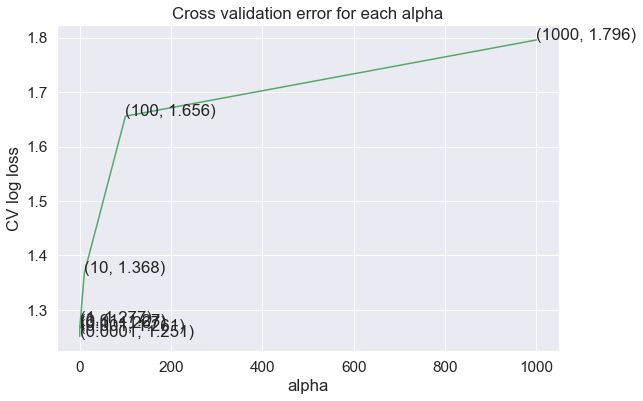

In [61]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [62]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=MultinomialNB(alpha=best_alpha)
model.fit(train_bow_df,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_bow_df,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_bow_df)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_bow_df)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_bow_df)))


log loss with best alpha on Training data: 0.9621995694726143
log loss with best alpha on Test data: 1.3734535234609273
log loss with best alpha on CV data: 1.25122306728042


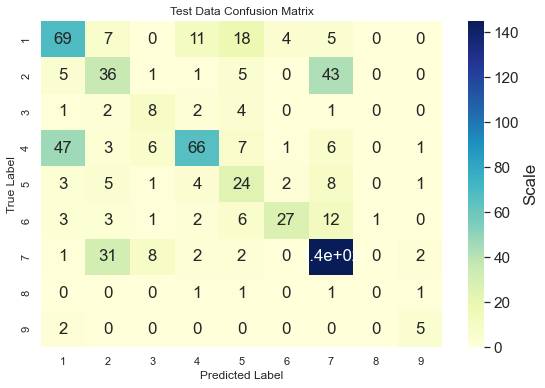

In [63]:
pred=clf.predict(test_bow_df)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")

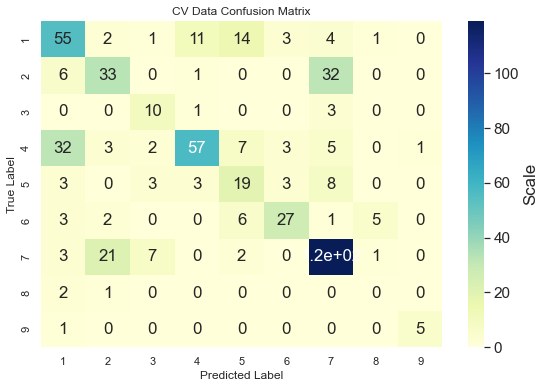

In [64]:
pred=clf.predict(cv_bow_df)
matrix=confusion_matrix(y_cv,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="CV Data Confusion Matrix")

#### 4.1.2 MultiNomailNB with TFIDF

In [65]:
## MultiNomailNB with TFIDF
alpha=[10**i for i in range(-4,4)]
cv_error_lt=[]
for i in alpha:
    model=MultinomialNB(alpha=i)
    model.fit(train_df_tfidf,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_df_tfidf,y_train)
    pred=clf.predict_proba(cv_df_tfidf)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  

For the calue of alpha 0.0001 log loss ::1.157509561832669
For the calue of alpha 0.001 log loss ::1.1574628344616684
For the calue of alpha 0.01 log loss ::1.1464000451301044
For the calue of alpha 0.1 log loss ::1.1769781228619376
For the calue of alpha 1 log loss ::1.2029265897768597
For the calue of alpha 10 log loss ::1.2318058986646945
For the calue of alpha 100 log loss ::1.2533809365787343
For the calue of alpha 1000 log loss ::1.2588090573918358


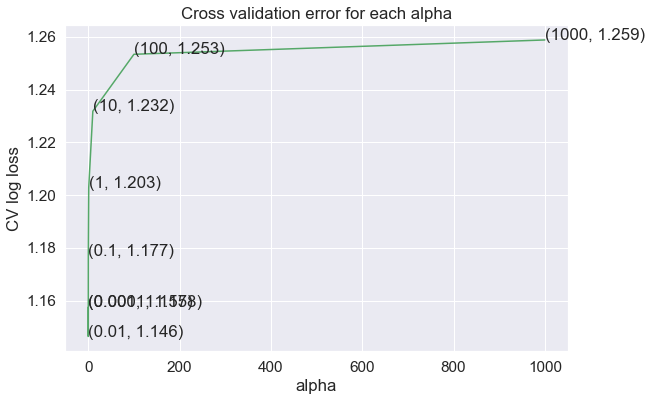

In [66]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [67]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=MultinomialNB(alpha=best_alpha)
model.fit(train_df_tfidf,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_df_tfidf,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_df_tfidf)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_df_tfidf)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_df_tfidf)))


log loss with best alpha on Training data: 0.617024879981238
log loss with best alpha on Test data: 1.2667904480846968
log loss with best alpha on CV data: 1.1464000451301044


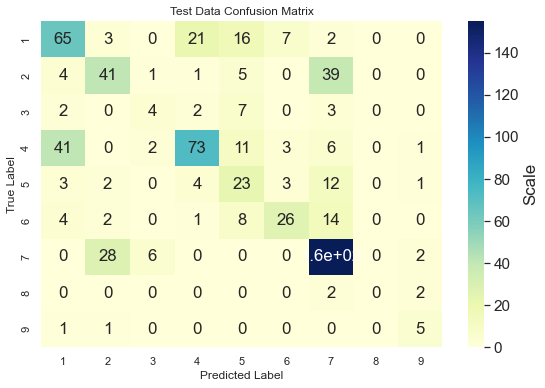

In [68]:
pred=clf.predict(test_df_tfidf)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")

### 4.2 Logistic Regression

#### 4.2.1 Logistic Regression with balancing (BOW)

In [69]:
## SGDClassifier with BOW
alpha=[10**i for i in range(-4,4)]
cv_error_lt=[]
for i in alpha:
    model=SGDClassifier(alpha=i,class_weight="balanced",penalty="l2",loss="log",n_jobs=-1)
    model.fit(train_bow_df,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_bow_df,y_train)
    pred=clf.predict_proba(cv_bow_df)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  


For the calue of alpha 0.0001 log loss ::1.8308895156109954
For the calue of alpha 0.001 log loss ::1.3115242551313104
For the calue of alpha 0.01 log loss ::1.271272608007107
For the calue of alpha 0.1 log loss ::1.2620705100909244
For the calue of alpha 1 log loss ::1.1473541150534448
For the calue of alpha 10 log loss ::1.1171226668902887
For the calue of alpha 100 log loss ::1.2699065621867134
For the calue of alpha 1000 log loss ::1.6438110126348215


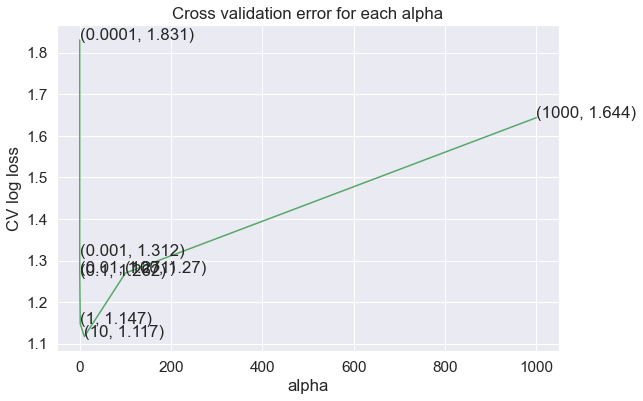

In [70]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [71]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=SGDClassifier(alpha=best_alpha,class_weight="balanced",penalty="l2",loss="log",n_jobs=-1)
model.fit(train_bow_df,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_bow_df,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_bow_df)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_bow_df)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_bow_df)))


log loss with best alpha on Training data: 0.8776779123167094
log loss with best alpha on Test data: 1.2776332390652159
log loss with best alpha on CV data: 1.122140857311976


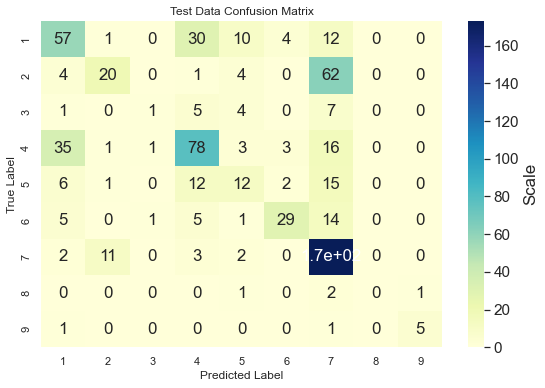

In [72]:
pred=clf.predict(test_bow_df)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")


#### 4.2.1 Logistic Regression with balancing (TFIDF)

In [73]:
## SGDClassifier with TFIDF
alpha=[10**i for i in range(-4,4)]
cv_error_lt=[]
for i in alpha:
    model=SGDClassifier(alpha=i,class_weight="balanced",penalty="l1",loss="log",n_jobs=-1)
    model.fit(train_df_tfidf,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_df_tfidf,y_train)
    pred=clf.predict_proba(cv_df_tfidf)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  

For the calue of alpha 0.0001 log loss ::1.0118773048977288
For the calue of alpha 0.001 log loss ::1.1579923609968386
For the calue of alpha 0.01 log loss ::1.5905191616506187
For the calue of alpha 0.1 log loss ::1.8303536160951817
For the calue of alpha 1 log loss ::1.8303536159664813
For the calue of alpha 10 log loss ::1.830353615964826
For the calue of alpha 100 log loss ::1.8303536159647846
For the calue of alpha 1000 log loss ::1.8303536159647815


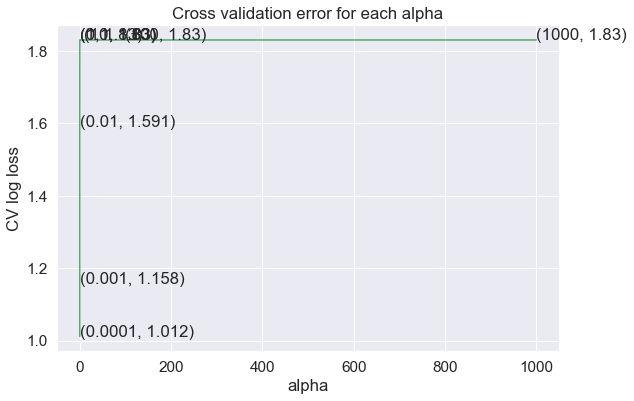

In [74]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [75]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=SGDClassifier(alpha=best_alpha,class_weight="balanced",penalty="l1",loss="log",n_jobs=-1)
model.fit(train_df_tfidf,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_df_tfidf,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_df_tfidf)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_df_tfidf)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_df_tfidf)))


log loss with best alpha on Training data: 0.4929763832814662
log loss with best alpha on Test data: 1.1387736609967654
log loss with best alpha on CV data: 1.0029586822670937


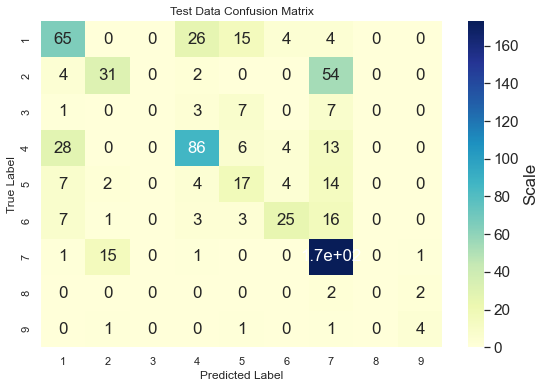

In [76]:
pred=clf.predict(test_df_tfidf)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")


### 4.3 Support Vector Machine

#### 4.3.1 Support Vector Machine with balanced(BOW)

In [77]:
## SGDClassifier with BOW
alpha=[10**i for i in range(-4,4)]
cv_error_lt=[]
for i in alpha:
    model=SGDClassifier(alpha=i,class_weight="balanced",penalty="l2",loss="hinge",n_jobs=-1)
    model.fit(train_bow_df,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_bow_df,y_train)
    pred=clf.predict_proba(cv_bow_df)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  


For the calue of alpha 0.0001 log loss ::1.8308895156109954
For the calue of alpha 0.001 log loss ::1.3268356065418254
For the calue of alpha 0.01 log loss ::1.2756531728473006
For the calue of alpha 0.1 log loss ::1.2621631083284153
For the calue of alpha 1 log loss ::1.2271888931199857
For the calue of alpha 10 log loss ::1.1754539401872843
For the calue of alpha 100 log loss ::1.2755271573713753
For the calue of alpha 1000 log loss ::1.633613546834443


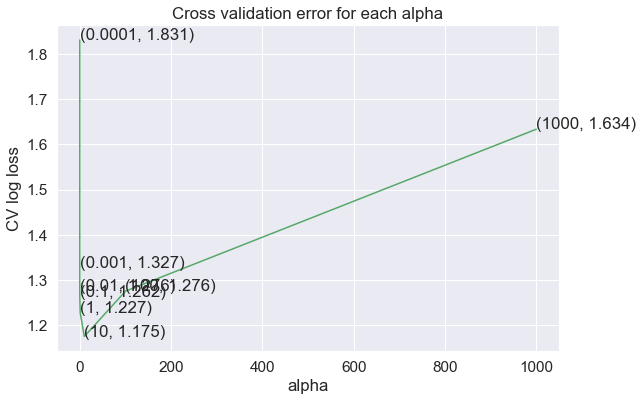

In [78]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [79]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=SGDClassifier(alpha=best_alpha,class_weight="balanced",penalty="l2",loss="hinge",n_jobs=-1)
model.fit(train_bow_df,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_bow_df,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_bow_df)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_bow_df)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_bow_df)))


log loss with best alpha on Training data: 0.8757214152442541
log loss with best alpha on Test data: 1.304359685782806
log loss with best alpha on CV data: 1.175076749722927


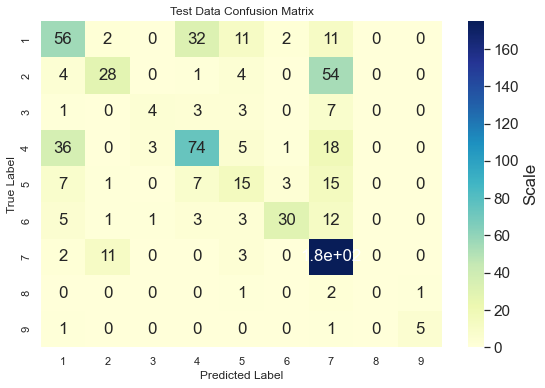

In [80]:
pred=clf.predict(test_bow_df)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")


#### 4.3.2 Support Vector Machine with balanced(TFIDF)

In [81]:
## SGDClassifier with TFIDF
alpha=[10**i for i in range(-4,4)]
cv_error_lt=[]
for i in alpha:
    model=SGDClassifier(alpha=i,class_weight="balanced",penalty="l1",loss="hinge",n_jobs=-1)
    model.fit(train_df_tfidf,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_df_tfidf,y_train)
    pred=clf.predict_proba(cv_df_tfidf)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  

For the calue of alpha 0.0001 log loss ::1.119181739312425
For the calue of alpha 0.001 log loss ::1.3850606513242791
For the calue of alpha 0.01 log loss ::1.6743492626561476
For the calue of alpha 0.1 log loss ::1.830353618060529
For the calue of alpha 1 log loss ::1.8303536159731744
For the calue of alpha 10 log loss ::1.8303536159649636
For the calue of alpha 100 log loss ::1.8303536159647953
For the calue of alpha 1000 log loss ::1.8303536159647835


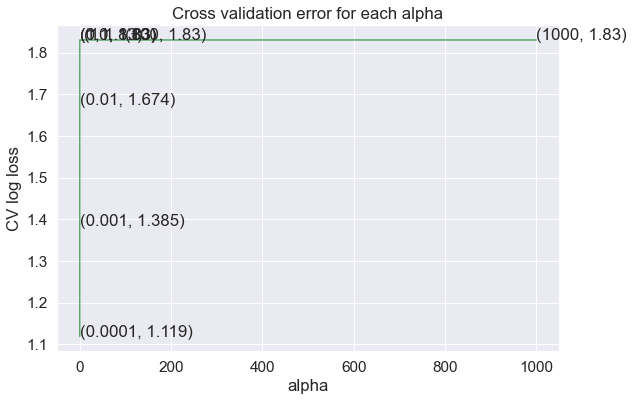

In [82]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [83]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=SGDClassifier(alpha=best_alpha,class_weight="balanced",penalty="l1",loss="hinge",n_jobs=-1)
model.fit(train_df_tfidf,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_df_tfidf,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_df_tfidf)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_df_tfidf)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_df_tfidf)))


log loss with best alpha on Training data: 0.5465512600998207
log loss with best alpha on Test data: 1.2476993645009162
log loss with best alpha on CV data: 1.1289666188045602


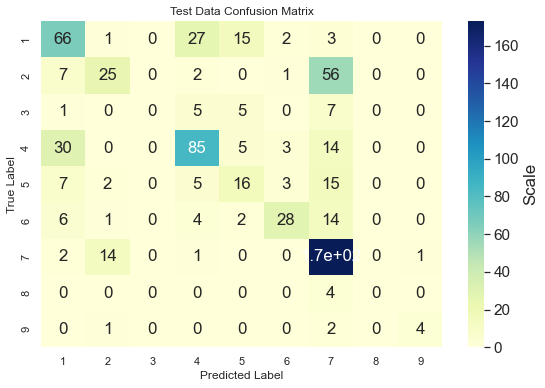

In [84]:
pred=clf.predict(test_df_tfidf)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")


#### 4.4 KNN classifier

#### 4.4.1 KNeighborsClassifier with BOW

In [85]:
## KNeighborsClassifier with BOW
alpha=[i for i in np.arange(5,100,10)]
cv_error_lt=[]
for i in alpha:
    model=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    model.fit(train_bow_df,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_bow_df,y_train)
    pred=clf.predict_proba(cv_bow_df)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  

For the calue of alpha 5 log loss ::1.1817411514622922
For the calue of alpha 15 log loss ::1.2688476489641012
For the calue of alpha 25 log loss ::1.3083650255672536
For the calue of alpha 35 log loss ::1.3412013412661934
For the calue of alpha 45 log loss ::1.3616566724368497
For the calue of alpha 55 log loss ::1.3722842130523774
For the calue of alpha 65 log loss ::1.3807949892896338
For the calue of alpha 75 log loss ::1.3878249884123937
For the calue of alpha 85 log loss ::1.3884865940950297
For the calue of alpha 95 log loss ::1.4004500202465593


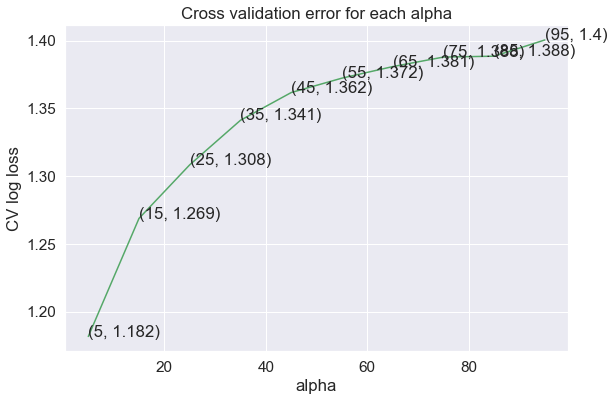

In [86]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [87]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=KNeighborsClassifier(n_neighbors=best_alpha,n_jobs=-1)
model.fit(train_bow_df,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_bow_df,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_bow_df)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_bow_df)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_bow_df)))


log loss with best alpha on Training data: 0.9359228435861102
log loss with best alpha on Test data: 1.335061592592927
log loss with best alpha on CV data: 1.1817411514622922


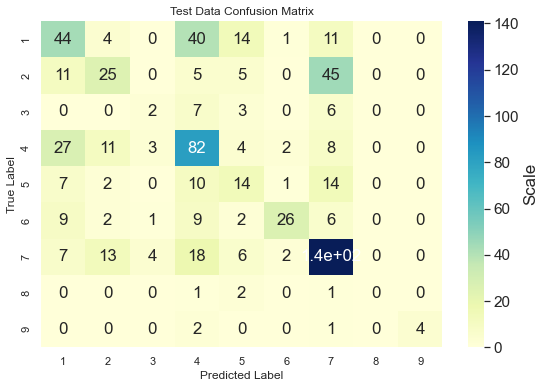

In [88]:
pred=clf.predict(test_bow_df)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")


#### 4.4.2 KNeighborsClassifier with TFIDF

In [89]:
## KNeighborsClassifier with TFIDF
alpha=[i for i in np.arange(2,50,5)]
cv_error_lt=[]
for i in alpha:
    model=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    model.fit(train_df_tfidf,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_df_tfidf,y_train)
    pred=clf.predict_proba(cv_df_tfidf)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  

For the calue of alpha 2 log loss ::1.1537566048101764
For the calue of alpha 7 log loss ::1.0932047355388939
For the calue of alpha 12 log loss ::1.1222713551903087
For the calue of alpha 17 log loss ::1.1435571721342734
For the calue of alpha 22 log loss ::1.166600201136215
For the calue of alpha 27 log loss ::1.1809428689428187
For the calue of alpha 32 log loss ::1.1927427547319653
For the calue of alpha 37 log loss ::1.2047347415124332
For the calue of alpha 42 log loss ::1.2128444024233427
For the calue of alpha 47 log loss ::1.225543296670065


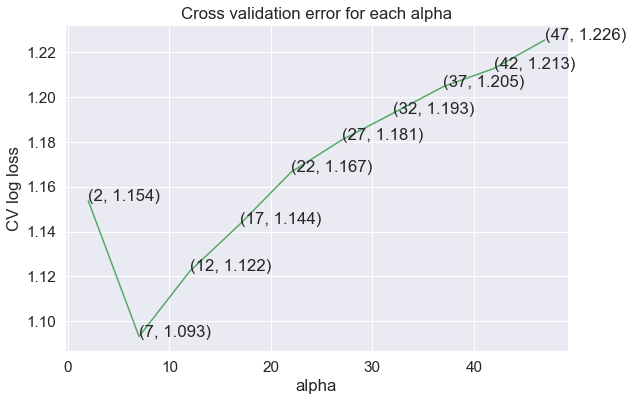

In [90]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [91]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=KNeighborsClassifier(n_neighbors=best_alpha,n_jobs=-1)
model.fit(train_df_tfidf,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_df_tfidf,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_df_tfidf)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_df_tfidf)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_df_tfidf)))


log loss with best alpha on Training data: 0.9067838511242281
log loss with best alpha on Test data: 1.185056564398821
log loss with best alpha on CV data: 1.0932047355388939


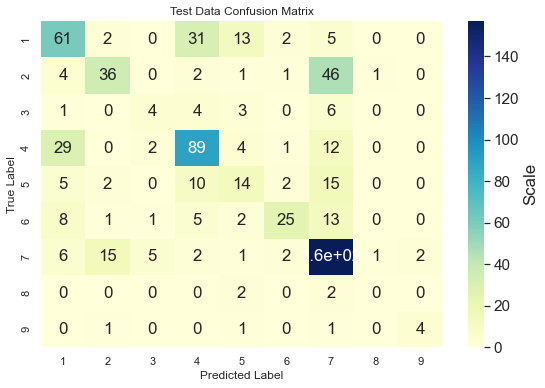

In [92]:
pred=clf.predict(test_df_tfidf)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")


### 4.5 RandomForestClassifier

#### 4.5.1 RandomForestClassifier with BOW

In [93]:
## RandomForestClassifier with BOW
alpha=[i for i in np.arange(100,500,100)]
cv_error_lt=[]
for i in alpha:
    model=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    model.fit(train_bow_df,y_train)
    clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
    clf.fit(train_bow_df,y_train)
    pred=clf.predict_proba(cv_bow_df)
    loss_val=log_loss(y_cv,pred)
    cv_error_lt.append(loss_val)
    print("For the calue of alpha {0} log loss ::{1}".format(i,loss_val))
  

For the calue of alpha 100 log loss ::1.0443037250822926
For the calue of alpha 200 log loss ::1.0447694914444914
For the calue of alpha 300 log loss ::1.0471471250271778
For the calue of alpha 400 log loss ::1.0457167465802997


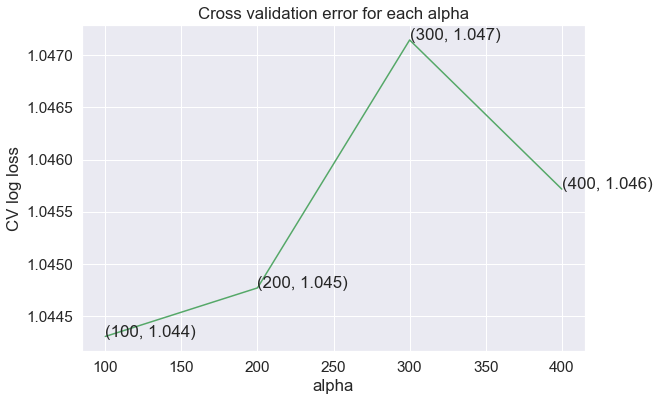

In [94]:

fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(alpha,cv_error_lt,c='g')
plt.title("Cross validation error for each alpha")
for i, txt in enumerate(np.round(cv_error_lt,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_error_lt[i]))
plt.xlabel("alpha")
plt.ylabel("CV log loss")

plt.show()

In [95]:
#Train with best alpha after cross validation
best_alpha=alpha[np.argmin(cv_error_lt)]
model=RandomForestClassifier(n_estimators=best_alpha,n_jobs=-1)
model.fit(train_bow_df,y_train)
clf=CalibratedClassifierCV(base_estimator=model,method="sigmoid")
clf.fit(train_bow_df,y_train)
print("log loss with best alpha on Training data:",log_loss(y_train,clf.predict_proba(train_bow_df)))
print("log loss with best alpha on Test data:",log_loss(y_test,clf.predict_proba(test_bow_df)))
print("log loss with best alpha on CV data:",log_loss(y_cv,clf.predict_proba(cv_bow_df)))


log loss with best alpha on Training data: 0.37092073532847863
log loss with best alpha on Test data: 1.1758815245286027
log loss with best alpha on CV data: 1.0512722068488638


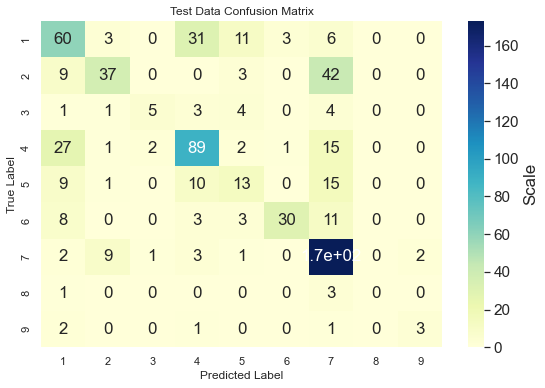

In [96]:
pred=clf.predict(test_bow_df)
matrix=confusion_matrix(y_test,pred)
plot_confusion_matrix(matrix,labels=[1,2,3,4,5,6,7,8,9],title="Test Data Confusion Matrix")


## Conclusion

In [98]:
! pip install tabulate

In [99]:
from tabulate import tabulate
columns=["model","text vector","test loss","cv loss"]
summary=[["MultiNomialNB","BOW",1.37,1.25]
         ,["MultiNomialNB","TFIDF",1.26,1.14]
         ,["Logistic Regression with balancing","BOW",1.27,1.22]
         ,["Logistic Regression with balancing","TFIDF",1.13,1.00]
         ,["SVM with balancing","BOW",1.30,1.17]
         ,["SVM with balancing","TFIDF",1.24,1.12]
         ,["KNeighborsClassifier","BOW",1.33,1.18]
         ,["KNeighborsClassifier","TFIDF",1.18,1.09]
         ,["RandomForestClassifier","BOW",1.17,1.05]
        ]
summary_df=pd.DataFrame(summary,columns=columns)
#https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/
print(tabulate(summary_df,headers="keys",tablefmt = 'psql'))

+----+------------------------------------+---------------+-------------+-----------+
|    | model                              | text vector   |   test loss |   cv loss |
|----+------------------------------------+---------------+-------------+-----------|
|  0 | MultiNomialNB                      | BOW           |        1.37 |      1.25 |
|  1 | MultiNomialNB                      | TFIDF         |        1.26 |      1.14 |
|  2 | Logistic Regression with balancing | BOW           |        1.27 |      1.22 |
|  3 | Logistic Regression with balancing | TFIDF         |        1.13 |      1    |
|  4 | SVM with balancing                 | BOW           |        1.3  |      1.17 |
|  5 | SVM with balancing                 | TFIDF         |        1.24 |      1.12 |
|  6 | KNeighborsClassifier               | BOW           |        1.33 |      1.18 |
|  7 | KNeighborsClassifier               | TFIDF         |        1.18 |      1.09 |
|  8 | RandomForestClassifier             | BOW       